# 뉴스 기사 분류: 다중 분류 문제

> 이전 섹션에서 완전 연결된 신경망을 사용해 벡터 입력을 어떻게 두 개의 클래스로 분류하는지 보았다.

> 이번 세션에서는 로이터 뉴스를 46개의 상호 배타적인 토픽으로 분류하는 신경망을 만들어 보겠다. 클래스가 많기 때문에 이 문제는 다중 분류의 예이다. 

## 로이터 데이터셋

> 1986년에 로이터에서 공개한 짧은 뉴스 기사와 토픽의 집합인 로이터 데이터셋을 사용한다. 
- 46개의 토픽이 있으며 어떤 토픽은 다른 것에 비해 데이터가 많다. 
- 각 토픽은 훈련 세트에 최소한 10개의 샘플을 가지고 있다.

# 1. 데이터셋 얻기

In [1]:
from keras.datasets import reuters
import numpy as np 

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

print(len(train_data))
print(len(test_data))

2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
8982
2246


> IMDB 데이터셋에서처럼 num_words=10000 매개변수는 데이터에서 가장 자주 등장하는 단어 10,000개로 제한한다.

> 여기에는 8,982개의 훈련 샘플과 2,246개의 테스트 샘플이 있다.

In [2]:
print(train_data[0])
print(train_labels[0])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
3


> IMDB 리뷰처럼 각 샘플은 정수 리스트이다.

# 2. 데이터 확인

## 2.1 리뷰 확인

In [3]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key,value) in word_index.items()])
decoded_news = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])

550378/550378 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
decoded_news

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

> 위와 같이 간단하게 첫 번째 뉴스를 확인할 수 있다.

## 2.2 labels 확인

In [5]:
unique_elements, counts_elements = np.unique(train_labels, return_counts=True)
np.asarray((unique_elements, counts_elements))

array([[   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
          11,   12,   13,   14,   15,   16,   17,   18,   19,   20,   21,
          22,   23,   24,   25,   26,   27,   28,   29,   30,   31,   32,
          33,   34,   35,   36,   37,   38,   39,   40,   41,   42,   43,
          44,   45],
       [  55,  432,   74, 3159, 1949,   17,   48,   16,  139,  101,  124,
         390,   49,  172,   26,   20,  444,   39,   66,  549,  269,  100,
          15,   41,   62,   92,   24,   15,   48,   19,   45,   39,   32,
          11,   50,   10,   49,   19,   19,   24,   36,   30,   13,   21,
          12,   18]], dtype=int64)

<Axes: ylabel='Count'>

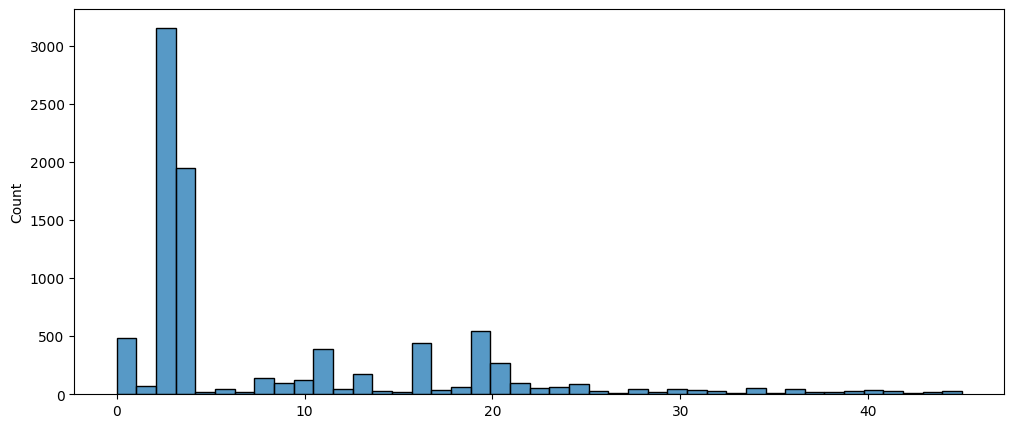

In [6]:
import seaborn as sns 
import matplotlib.pyplot as plt

fig,axe = plt.subplots(ncols=1)
fig.set_size_inches(12, 5)
sns.histplot(train_labels)

> 3, 4번 토픽이 많은 내용을 차지하고 있는 것을 볼 수 있다.

# 3. 데이터 준비

In [7]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [8]:
X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)

> 이전의 예제와 동일한 코드를 사용해서 데이터를 벡터로 변환할 수 있다.

In [9]:
from keras.utils import to_categorical

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

> labels 정보도 46개가 존재하여 to_categorical 함수를 이용해 one_hot encoding 처리 했다.

In [10]:
y_train[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

# 4. 모델 구성

> 이 토픽 분류 문제는 이전의 영화 리뷰 분류 문제와 비슷해 보인다. 두 경우 모두 짧은 텍스트를 분류하는 것이지만 출력 클래스의 개수가 2에서 46개로 늘어난 점이 다르다.

> 이전에 사용했던 것처럼 `Dense` 층을 쌓으면 각 층은 이전 층의 출력에서 제공한 정보만 사용할 수 있다. 한 층이 분류 문제에 필요한 일부 정보를 누락하면 그 다음 층에서 이를 복원할 방법이 없다. 이전 예제에서 16차원을 가진 중간층을 사용했지만 16차원 공간은 46개의 클래스를 구분하기에 너무 작다. 이렇게 규모가 작은 층은 유용한 정보를 완전히 잃게 되는 정보의 병목 지점처럼 동작할 수 있다. 이런 이유로 좀 더 규모가 큰 층을 사용하기 위해 64개의 유닛을 사용했다.

In [11]:
from keras import  models
from keras import layers, Input

model = models.Sequential()
model.add(Input(shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [12]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# 5. 훈련 검증

## 5.1 데이터 분리

In [17]:
X_val = X_train[:1000]
partial_X_train = X_train[1000:]

y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [18]:
X_val.shape

(1000, 10000)

In [19]:
partial_X_train.shape

(7982, 10000)

이제 20번의 에포크로 모델을 훈련시킵니다:

## 5.2 학습 및 검증

In [20]:
history = model.fit(partial_X_train, partial_y_train, epochs=20, batch_size=512, validation_data=(X_val, y_val))

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.3627 - loss: 3.2721 - val_accuracy: 0.6380 - val_loss: 1.9614
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6728 - loss: 1.7365 - val_accuracy: 0.6900 - val_loss: 1.4288
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7274 - loss: 1.2648 - val_accuracy: 0.7220 - val_loss: 1.2311
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7842 - loss: 1.0221 - val_accuracy: 0.7680 - val_loss: 1.0876
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8229 - loss: 0.8572 - val_accuracy: 0.7840 - val_loss: 1.0095
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8501 - loss: 0.6993 - val_accuracy: 0.8050 - val_loss: 0.9620
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8814 - loss: 0.5794 - val_accuracy: 0.8030 - val_loss: 0.9189
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8950 - loss: 0.4989 - val_accuracy: 0.8070 - val_

## 5.3 차트를 통한 결과 확인

In [22]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

> 모델 컴파일 시 metrics를 accuracy로 지정하여 이전과 다르게 acc가 아닌 accuracy로 나타남.

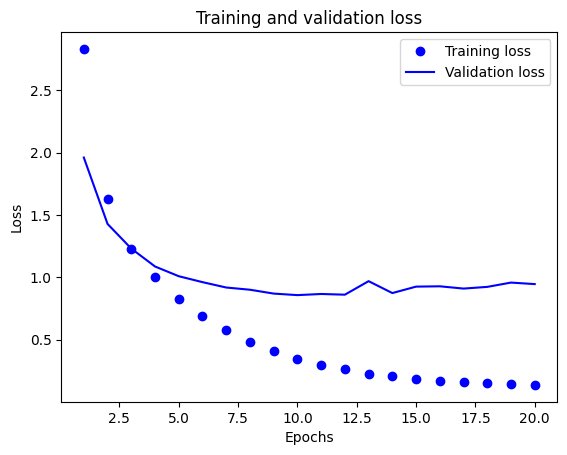

In [23]:
import matplotlib.pyplot as plt

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

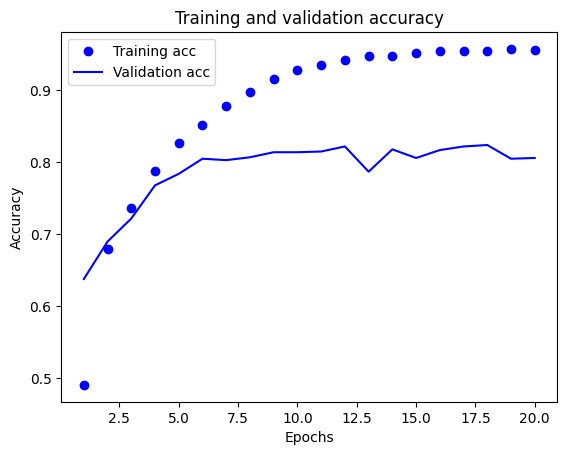

In [24]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

> 검증 데이터가 8까지는 계속 줄다가 9에서 살짝 올라가고 10에서 살짝 내려갔다가 다시 차츰 올라가고 있다.

> 이 모델은 9번째 에포크 이후에 과대적합이 시작되는 것으로 보인다. 

> 따라서 손실함수에서 8, 정확도에서는 9가 적당한 에포크로 보이며 여기서는 9를 에포크로 사용해 보도록 하겠다.

# 6. 모델 다시 만들기

In [25]:
model = models.Sequential()
model.add(Input(shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(partial_X_train, partial_y_train, epochs=9, batch_size=512, validation_data=(X_val, y_val))

Epoch 1/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.3233 - loss: 3.3012 - val_accuracy: 0.6140 - val_loss: 1.9537
Epoch 2/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6689 - loss: 1.7233 - val_accuracy: 0.7060 - val_loss: 1.3956
Epoch 3/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7457 - loss: 1.2096 - val_accuracy: 0.7280 - val_loss: 1.2183
Epoch 4/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7878 - loss: 0.9886 - val_accuracy: 0.7460 - val_loss: 1.1116
Epoch 5/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8217 - loss: 0.8195 - val_accuracy: 0.7680 - val_loss: 1.0252
Epoch 6/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8449 - loss: 0.6879 - val_accuracy: 0.7930 - val_loss: 0.9535
Epoch 7/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8824 - loss: 0.5714 - val_accuracy: 0.8030 - val_loss: 0.9136
Epoch 8/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9052 - loss: 0.4748 - val_accuracy: 0.8060 - val_loss: 0.8859

In [26]:
results = model.evaluate(X_test, y_test)
results

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8027 - loss: 0.9155


[0.940043032169342, 0.7885128855705261]

> 대략 79%의 정확도를 달성했다. 보통 균형 잡힌 이진 분류 문제에서 완전히 무작위로 분류하면 50%의 정확도를 달성한다. 여기에 비하면 이 결과는 꽤 좋은 편이다.

# 7. 새로운 데이터에 대해 예측하기

> 모델 인스턴스의 `predict` 메서드는 46개 토픽에 대한 확률 분포를 반환한다. 테스트 데이터 전체에 대한 토픽을 예측해 보자.

> X_test를 이용하여 예측한 결과 위와 같이 나타난다. 너무 많은 정보를 가지고 있어 확인하기가 어렵다. 첫 번째 데이터만 확인해 보자.

> 우선 데이터는 총 46개로 이루어져 있다. softmax는 46개의 데이터를 각각 확률 값으로 반환하는 함수이다.

> 이 벡터의 원소 합은 1이다. 46개를 확률로 표현한 것이므로 당연히 1이 나와야 한다.

> 가장 큰 값이 예측 클래스가 된다. 즉, 첫 번째 예측값은 3이다.

>y_test는 원핫 인코딩으로 되어 있어 argmax를 이용하거나 최초 데이터인 test_labels를 이용하여 결과를 확인할 수 있다.